## Entregável 4 
### Objetivo: 
- Realizar a Prática 3 do Hands-on 1 Python: Tempo de execução com uso de laço e com operação matricial incluindo um terceiro roteador a 50% da dimensão vertical e a 80% da dimensão horizontal 

/home/labsim/anaconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/labsim/anaconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/labsim/anaconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


Tempo de execução sem laço FOR: 0.14745000000000008


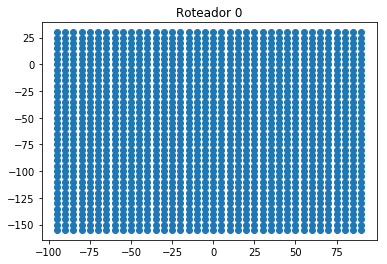

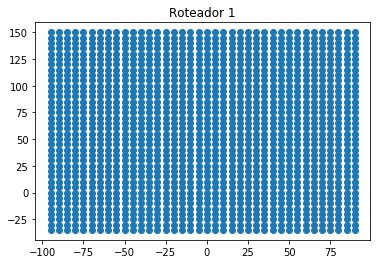

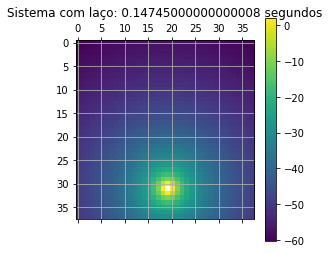

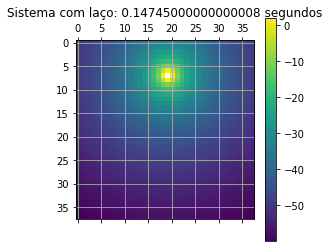

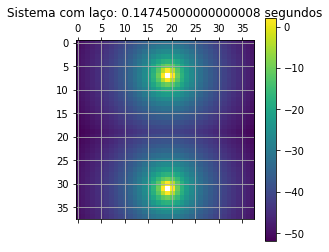

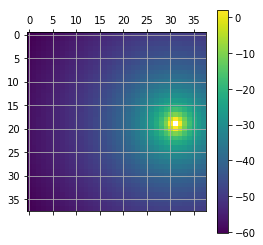

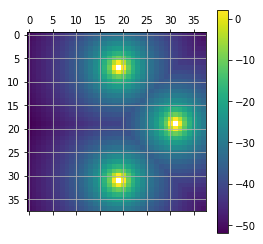

In [1]:
import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
start_time = time.clock()              # Primeira medição de tempo: inicia a contagem
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 200                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos 

x= np.arange(dPasso,dDim-dPasso,dPasso)
y=np.arange(dPasso,dDim-dPasso,dPasso)
X,Y = np.meshgrid(x,y)

# Matrizes com posição de cada ponto do grid relativa a cada roteador
pbs0 = X + 1j*Y - (dDim/2 + 0.8*dDim*1j)
pbs1 = X + 1j*Y - (dDim/2 + 0.2*dDim*1j)
pbs2 = X + 1j*Y - (dDim*0.8 + 0.5*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
pl0 = 10*np.log10(1/(np.absolute(pbs0)**4)/0.001)
pl1 = 10*np.log10(1/(np.absolute(pbs1)**4)/0.001)
pl2 = 10*np.log10(1/(np.absolute(pbs2)**4)/0.001)
plf = np.maximum(pl0,pl1)

stop_time = time.clock()               # Medição de tempo de execução
# A criação das matrizes e dos laços são a parte de interesse do algoritmo
# por isso a medição se encerra antes de fazermos a plotagem, que é meramente para visualização
tempo_de_execucao = stop_time - start_time
# Mostra tempo de execução na tela
print("Tempo de execução sem laço FOR: "+str(tempo_de_execucao))

from matplotlib import pyplot as plt   # Importa pyplot, que possui as funções essenciais para plotagem
plt.scatter(pbs0.real,pbs0.imag)       # Monta o plot do mapa de pontos do reteador 0
plt.title("Roteador 0")                # Configura o título do plot
plt.show()                             # Mostra o plot do mapa de pontos
plt.scatter(pbs1.real,pbs1.imag)       # Monta o plot do mapa de pontos do reteador 1
plt.title("Roteador 1")                # Configura o título do plot
plt.matshow(pl0)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.matshow(pl1)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
# Monta mapa de cores de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.matshow(plf)                 
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)

plt.matshow(pl2)                      
plt.grid()                             
plt.colorbar()                         

plf2 = np.maximum(plf,pl2)

plt.matshow(plf2)                      
plt.grid()                             
plt.colorbar() 


plt.show()


### Solução:

Basta adicionar um terceiro array. A porcentagem vertical (50%) da posição é aplicada sobre a parte imaginária, e a horizontal sobre a real.

```python
pbs2 = X + 1j*Y - (dDim*0.8 + 0.5*dDim*1j)

pl2 = 10*np.log10(1/(np.absolute(pbs2)**4)/0.001)

```
A plotagem é feita da mesma maneira que os demais arrays. Para conseguir o último gráfico, é necessário usar a np.maximum() mais uma vez:

```python
plf2 = np.maximum(plf,pl2)
```